In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
data_netflix = pd.read_csv('imdb/netflix_titles.csv')
data_netflix = data_netflix.rename(columns={'date_added': 'date_added_platform', 'duration': 'duration_seconds', 'listed_in': 'genre_type', 'type': 'movie_or_tv_show'})

data_netflix.drop(columns=['show_id'], axis=1, inplace=True)
data_netflix['cast'] = data_netflix['cast'].fillna('uninformed cast')
data_netflix['director'] = data_netflix['director'].fillna('uninformed director')
data_netflix['country'] = data_netflix['country'].fillna('uninformed country')

data_netflix['genre_type'] =  data_netflix['genre_type'].apply(lambda x: x.upper())
df_split = data_netflix['genre_type'].str.split(',', expand=True)
df_split = df_split.fillna('-')
df_split
group_dummies = [pd.get_dummies(df_split[y].apply(lambda x: x.strip()), dtype='int') for y in df_split.columns]
group_dummies[0].shape
group_dummies = pd.concat(group_dummies, axis=1)
group_dummies = group_dummies.fillna(0).astype('uint8')
group_dummies
data_netflix['title'] = data_netflix['title'].apply(lambda x : x.upper())
# DATASET INPUT TO K-MEANS CLUSTERS NEW SERIES SETS
X_genre_type = np.array(group_dummies)
X_genre_type
model_view_elbow =  KMeans()

# from yellowbrick.cluster import KElbowVisualizer
# 
# visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='silhouette')
# 
# visualizer.fit(X_genre_type)
# visualizer.show()

kmeans_model = KMeans(n_clusters = 34, random_state=0)
y_Kmeans34 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans34)
print(np.unique(y_Kmeans34))
print(len(np.unique(y_Kmeans34)))
print(f'Amount genre: {len(group_dummies.columns)}')

data_netflix_cluster = data_netflix.copy()
data_netflix_cluster['clusters_genre'] = y_Kmeans34

[ 3 13 15 ... 19 12 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
34
Amount genre: 108


In [20]:
name = 'The Stronghold'.upper()
data_netflix_cluster[data_netflix_cluster['title'] ==  name]

data_netflix_cluster = data_netflix.copy()
data_netflix_cluster['clusters_genre'] = y_Kmeans34
data_netflix_cluster[data_netflix_cluster['title'] ==  name][['clusters_genre', 'genre_type']]

data_netflix.head(100)

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,genre_type,description
0,Movie,DICK JOHNSON IS DEAD,Kirsten Johnson,uninformed cast,United States,"September 25, 2021",2020,PG-13,90 min,DOCUMENTARIES,"As her father nears the end of his life, filmm..."
1,TV Show,BLOOD & WATER,uninformed director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"INTERNATIONAL TV SHOWS, TV DRAMAS, TV MYSTERIES","After crossing paths at a party, a Cape Town t..."
2,TV Show,GANGLANDS,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",uninformed country,"September 24, 2021",2021,TV-MA,1 Season,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT...",To protect his family from a powerful drug lor...
3,TV Show,JAILBIRDS NEW ORLEANS,uninformed director,uninformed cast,uninformed country,"September 24, 2021",2021,TV-MA,1 Season,"DOCUSERIES, REALITY TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,KOTA FACTORY,uninformed director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"INTERNATIONAL TV SHOWS, ROMANTIC TV SHOWS, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
95,TV Show,THE CIRCLE,uninformed director,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,REALITY TV,Status and strategy collide in this social exp...
96,Movie,IF I LEAVE HERE TOMORROW: A FILM ABOUT LYNYRD ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"DOCUMENTARIES, MUSIC & MUSICALS","Using interviews and archival footage, this do..."
97,TV Show,KID COSMIC,uninformed director,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"KIDS' TV, TV COMEDIES, TV SCI-FI & FANTASY",A boy's superhero dreams come true when he fin...
98,TV Show,OCTONAUTS: ABOVE & BEYOND,uninformed director,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"BRITISH TV SHOWS, KIDS' TV",The Octonauts expand their exploration beyond ...


In [21]:
dupe = data_netflix[data_netflix['country'] == 'United States']
# data_netflix.shape
dupe.shape
# data_netflix_cluster['clusters_genre'] = y_Kmeans34

(2818, 11)

In [22]:
name = 'The Stronghold'.upper()
data_netflix_cluster[data_netflix_cluster['title'] ==  name] 

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,genre_type,description,clusters_genre
36,Movie,THE STRONGHOLD,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",uninformed country,"September 17, 2021",2021,TV-MA,105 min,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES","Tired of the small-time grind, three Marseille...",5


In [23]:
# data_netflix_cluster[data_netflix_cluster['title'] ==  name][['clusters_genre', 'genre_type']]
data_netflix.columns

Index(['movie_or_tv_show', 'title', 'director', 'cast', 'country',
       'date_added_platform', 'release_year', 'rating', 'duration_seconds',
       'genre_type', 'description'],
      dtype='object')

In [24]:
from dataclasses import dataclass

@dataclass
class QueryRecommends:
    dataset: pd.core.frame.DataFrame
    name: str
    top_n: int = 10

def recommends(query: QueryRecommends) -> pd.core.frame.DataFrame:
    result = query['dataset'][query['dataset']['title'] == query['name'].upper()][['clusters_genre']].reset_index()
    result = result.at[0, 'clusters_genre']
    return query['dataset'][query['dataset']['clusters_genre'] == int(result)][['title', 'genre_type']][:query['top_n']]

In [25]:
data_netflix.columns

Index(['movie_or_tv_show', 'title', 'director', 'cast', 'country',
       'date_added_platform', 'release_year', 'rating', 'duration_seconds',
       'genre_type', 'description'],
      dtype='object')

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data contains the cluster information
sns.scatterplot(data=data_netflix, x='rating', y='numVotes', hue='cluster')
plt.title('Cluster Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()


ValueError: Could not interpret value `numVotes` for parameter `y`

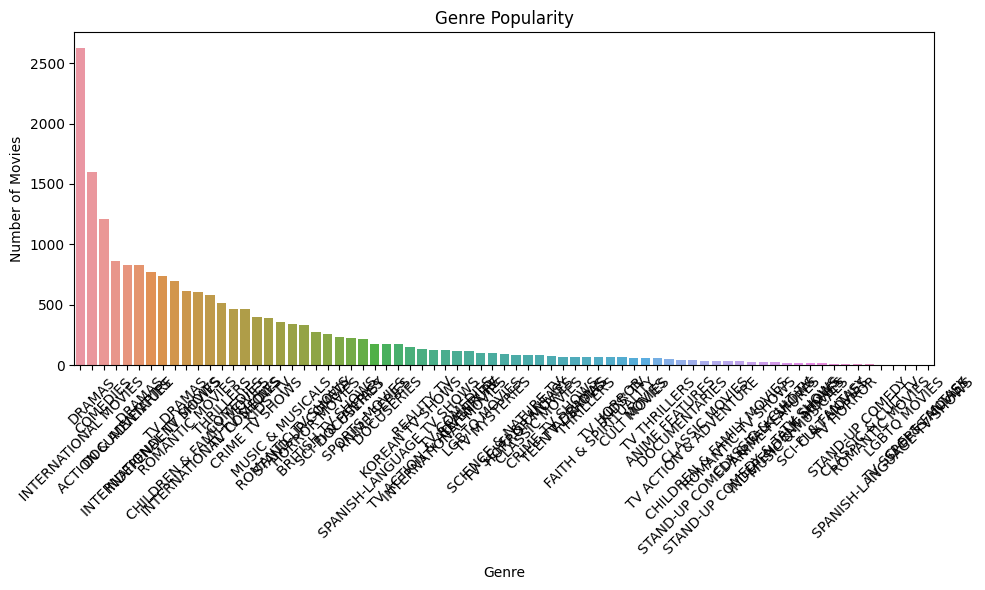

In [28]:
genre_counts = data_netflix['genre_type'].str.split(',').explode().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


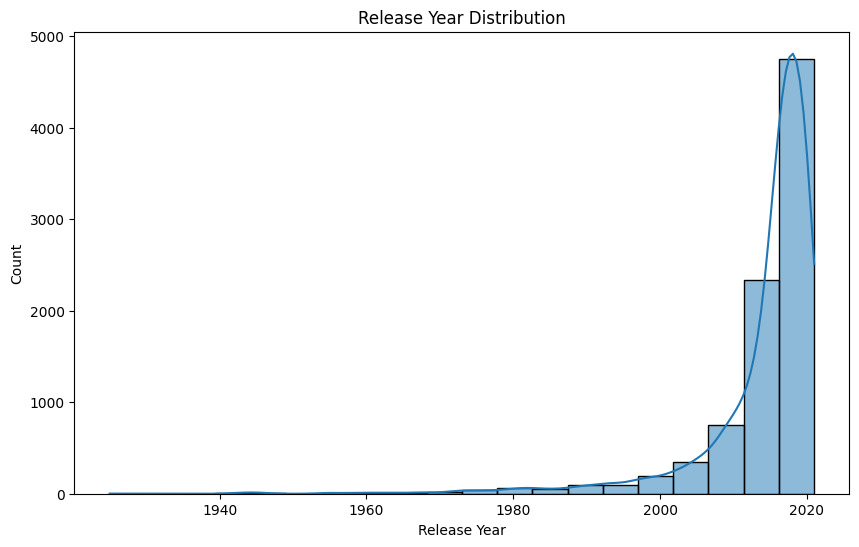

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=data_netflix, x='release_year', bins=20, kde=True)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


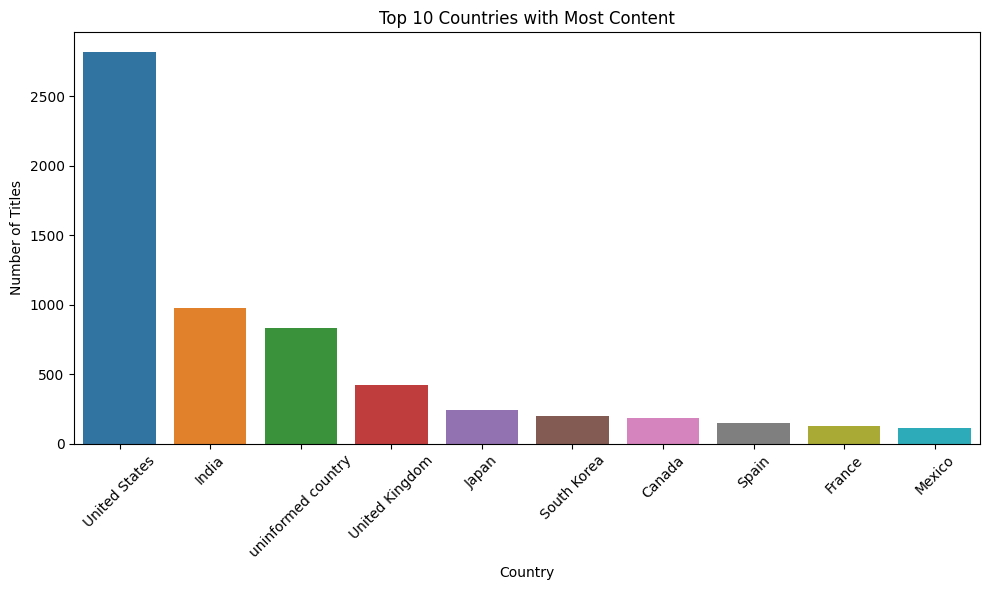

In [30]:
country_counts = data_netflix['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


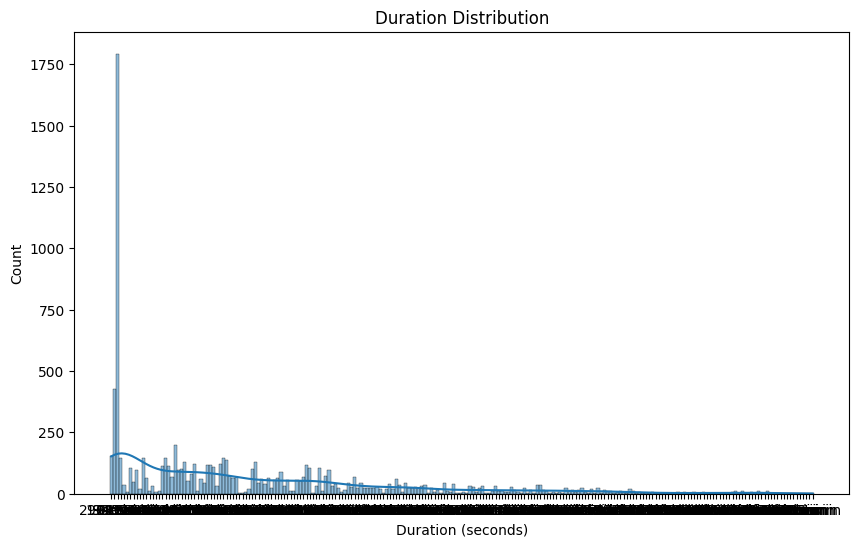

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_netflix, x='duration_seconds', bins=20, kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


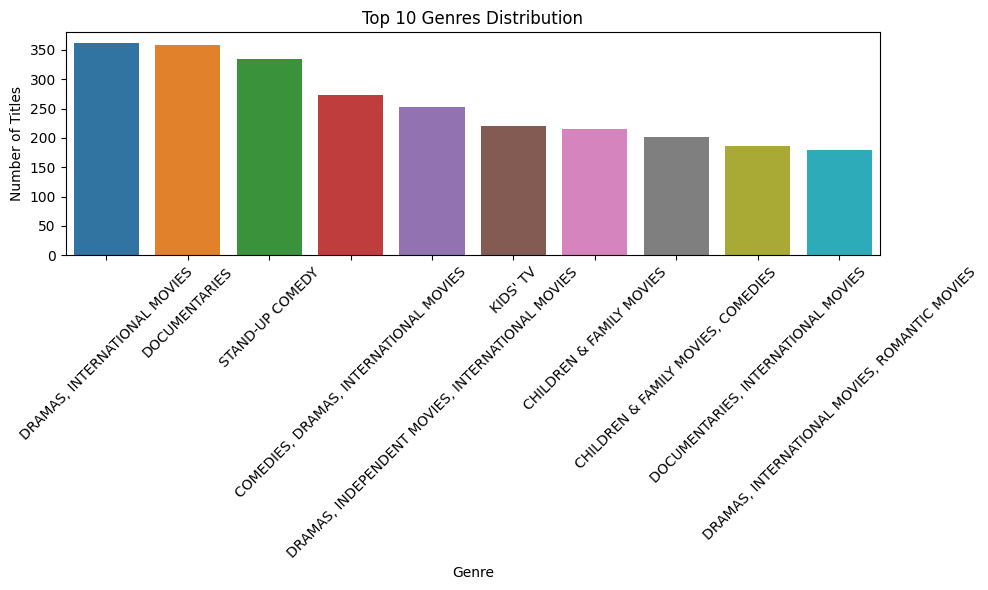

In [32]:
top_genres = data_netflix['genre_type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


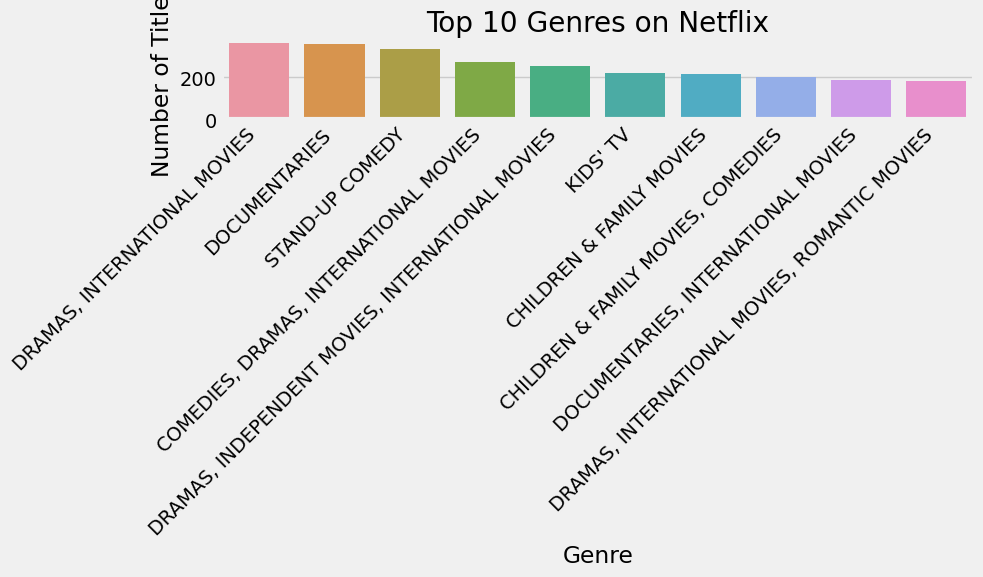

In [39]:
plt.figure(figsize=(10, 6))
top_10_genres = data_netflix['genre_type'].value_counts().head(10)
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


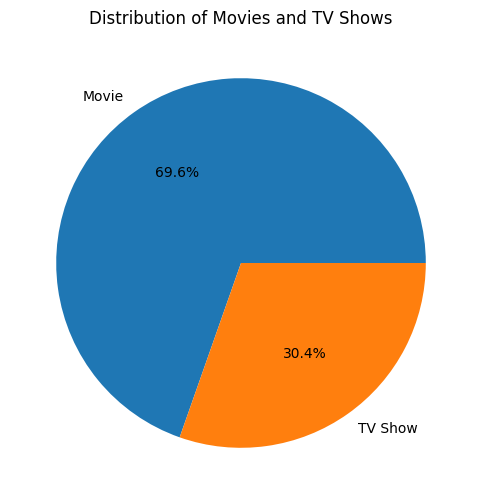

In [35]:
plt.figure(figsize=(6, 6))
data_netflix['movie_or_tv_show'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Movies and TV Shows')
plt.ylabel('')
plt.show()


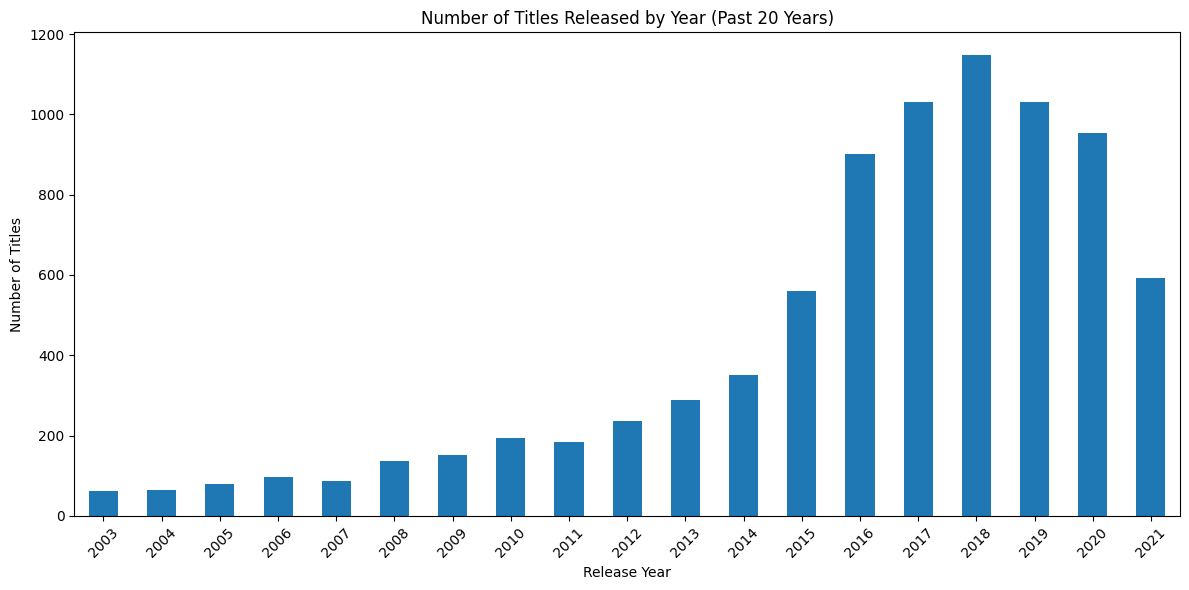

In [37]:
import datetime

current_year = datetime.datetime.now().year
past_20_years = range(current_year - 20, current_year + 1)

plt.figure(figsize=(12, 6))
data_netflix[data_netflix['release_year'].isin(past_20_years)]['release_year'].value_counts().sort_index().plot.bar()
plt.title('Number of Titles Released by Year (Past 20 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
